In [39]:
import functions 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# create timestep file 


In [66]:
ts = pd.read_csv('/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/2025Jan_output/TL/march2025test2/langtang_monthly_dfspot_count_20percent_landcover1.csv')
ts = ts.rename(columns ={'D_year':'year', 'D_month':'month'})[['year', 'month']]

In [67]:
ts.to_csv('/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/2025Jan_output/dt_for_sediment_storage.csv', index = False)

In [68]:
ts = pd.read_csv('/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/2025Jan_output/dt_for_sediment_storage.csv')

In [69]:
ts

,year,month
0,1989,9
1,1989,10
2,1989,11
3,1989,12
4,1990,1
...,...,...
392,2022,5
393,2022,6
394,2022,7
395,2022,8


## first! add timestep 

In [38]:
path = '/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/2025Jan_output/sediment_storage2/'


In [75]:
DF = pd.read_csv('/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/2025Jan_output/dt_for_sediment_storage.csv')


In [76]:
DF

,year,month
0,1989,9
1,1989,10
2,1989,11
3,1989,12
4,1990,1
...,...,...
392,2022,5
393,2022,6
394,2022,7
395,2022,8


In [77]:
import pandas as pd
import os

# Your DataFrame
# DF = pd.DataFrame(...)  # Assuming you already have this loaded

# Folder containing the CSV files
folder_path = path

# Loop over each CSV file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path, filename)
        
        # Load the CSV file
        data = pd.read_csv(file_path)
        
        # Combine with DF (e.g., concatenate along columns)
        combined = pd.concat([DF, data], axis=1)
        
        # Save back to the same file
        combined.to_csv(file_path, index=False)




In [78]:
DF

,year,month
0,1989,9
1,1989,10
2,1989,11
3,1989,12
4,1990,1
...,...,...
392,2022,5
393,2022,6
394,2022,7
395,2022,8


In [79]:
path = '/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/2025Jan_output/sediment_storage2/'
df = pd.read_csv(path + 'mustang_sediment_storage_end_of_each_month_once_landcover4_30percent.csv')#[['year',	'month','4485.0']]
df.head()

,year,month,3689.0,2546.0,3964.0,2571.0,2886.0,3795.0,3540.0,4420.0,...,4785.0,4439.0,4593.0,4603.0,4733.0,4905.0,4952.0,4812.0,4889.0,land_cover
0,1989,9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,landcover4
1,1989,10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,landcover4
2,1989,11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,landcover4
3,1989,12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,landcover4
4,1990,1,170.879022,171.091048,179.903774,165.701963,178.866729,185.651997,185.504715,207.674643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,landcover4


In [80]:

# df = pd.read_csv(path + 'mustang_sediment_storage_end_of_each_month_once_landcover1_60percent.csv')#[['year',	'month','4485.0']]

# # Pivot the table so months are rows, years are columns
# pivot_df = df.pivot(index='month', columns='year', values='2546.0')

# # Plot
# pivot_df.plot(marker='.', cmap = 'viridis', legend = False)
# plt.xlabel('Month')
# plt.ylabel('sc [mm] in the end of the month')
# plt.title('Monthly Values per Year')
# plt.legend(title='Year')
# plt.grid(True)


In [47]:

# df = pd.read_csv(path + 'langtang_sediment_storage_end_of_each_month_once_landcover4_20percent.csv')[['year',	'month','4485.0']]

# pivot_df = df.pivot(index='month', columns='year', values='4485.0')

# # Plot
# pivot_df.plot(marker='.', cmap = 'viridis', legend = True)
# plt.xlabel('Month')
# plt.ylabel('Value')
# plt.title('Monthly Values per Year')
# plt.grid(True)



In [ ]:
# plots with panels 

In [83]:
# pivot table and bin elevation - so that the different elevations can be plotted in the different 

def prepare_for_plot(df, new_name):
    
    # df = df.drop(['land_cover', 'index', 'index.1',	'year.1', 'month.1'], axis=1)
    df = df.drop(['land_cover'], axis=1)
    melted = pd.melt(df, id_vars=['year', 'month'], var_name='elevation', value_name=new_name)
    
    melted['elevation'] = melted['elevation'].astype(str).str.extract(r'^(\d+)')[0].astype(int)
    melted['elevation_bin'] = melted.apply(functions.bin_elevation500, axis=1)
    # melted = melted.sort_values('elevation_bin')
    melted['date_id'] = melted['year'].astype(str) + "_" + melted['month'].astype(str) + "_" + melted['elevation'].astype(str)
    # melted = melted.sort_values('date_id')
    # melted['landcover'] = landcover
    return melted 



manual_order = [
    '2500',             
    '2500 - 3000',
    '3000 - 3500',
    '3500 - 4000',
    '4000 - 4500',
    '4500 - 5000',
    '5000 - 5500',
    '5500 - 6000',
    '6000'              
]

def order_elevations(df):
    df["elevation_bin"] = pd.Categorical(
    df["elevation_bin"],
    categories=manual_order,
    ordered=True)
    return df

In [168]:
location = 'mustang'

method  = 'once'
percent = '60percent'

df1 = pd.read_csv(path + f'{location}_sediment_storage_end_of_each_month_{method}_landcover1_{percent}.csv')#[['year',	'month','4485.0']]
df2 = pd.read_csv(path + f'{location}_sediment_storage_end_of_each_month_{method}_landcover2_{percent}.csv')#[['year',	'month','4485.0']]
df3 = pd.read_csv(path + f'{location}_sediment_storage_end_of_each_month_{method}_landcover3_{percent}.csv')#[['year',	'month','4485.0']]
df4 = pd.read_csv(path + f'{location}_sediment_storage_end_of_each_month_{method}_landcover4_{percent}.csv')#[['year',	'month','4485.0']]
df5 = pd.read_csv(path + f'{location}_sediment_storage_end_of_each_month_{method}_landcover5_{percent}.csv')#[['year',	'month','4485.0']]

df1 = prepare_for_plot(df1, 'landcover1')
df2 = prepare_for_plot(df2, 'landcover2')
df3 = prepare_for_plot(df3, 'landcover3')
df4 = prepare_for_plot(df4, 'landcover4')
df5 = prepare_for_plot(df5, 'landcover5')

df1 = order_elevations(df1)
df2 = order_elevations(df2)
df3 = order_elevations(df3)
df4 = order_elevations(df4)
df5 = order_elevations(df5)

In [169]:
df = df1.merge(df2).merge(df3).merge(df4).merge(df5)

In [170]:
df_long = pd.melt(df, id_vars=['month', 'year', 'elevation_bin'], 
                  value_vars=['landcover1', 'landcover2', 'landcover3', 'landcover4', 'landcover5'],
                  var_name='land_cover', value_name='sc')

df_long['month'] = pd.Categorical(df_long['month'], 
                              categories=[1,2,3,4,5,6,7,8,9,10,11,12], 
                              ordered=True)

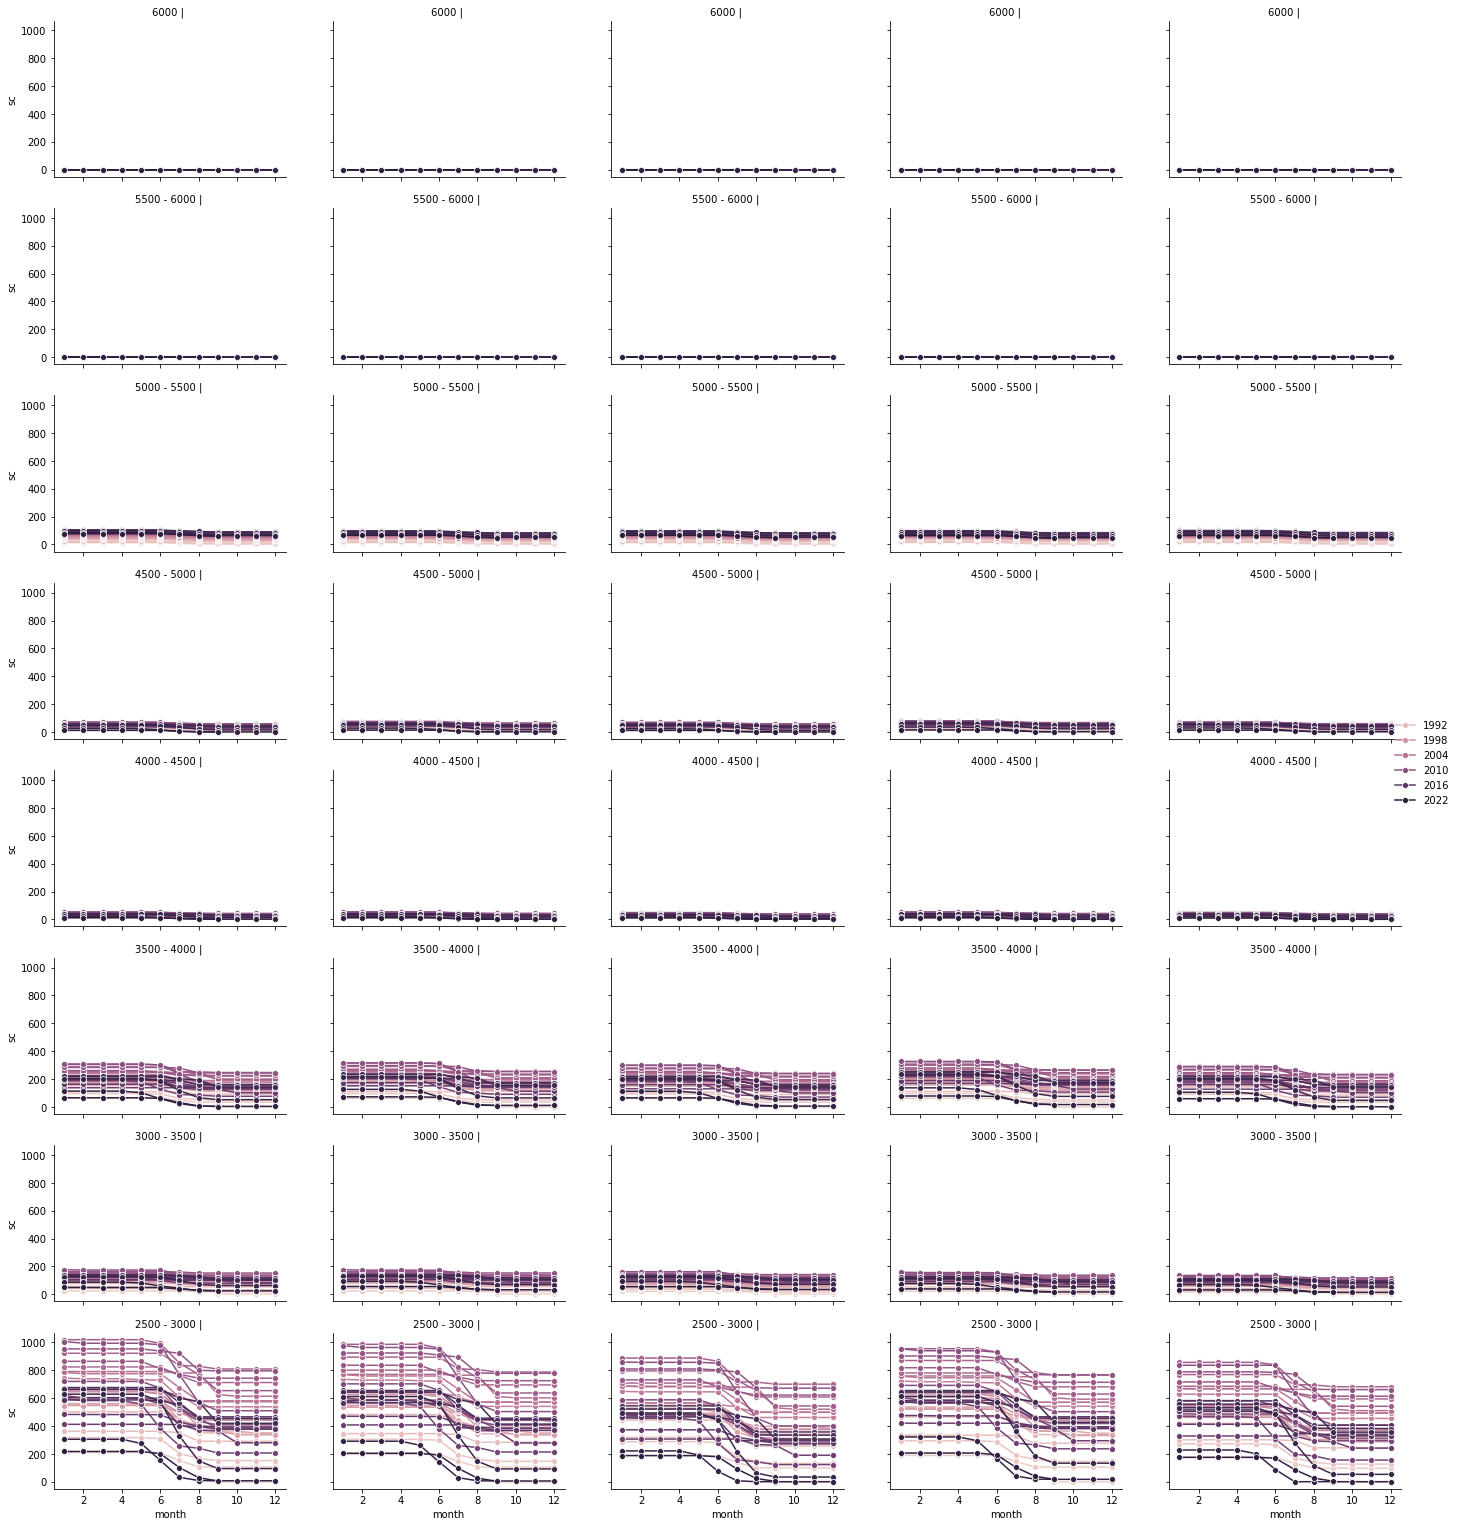

In [171]:
# Get sorted unique elevation bins (you might need to adapt this if bins are strings or intervals)
elevation_order = sorted(df_long["elevation_bin"].unique(), reverse=True)

# Then pass the reversed order to FacetGrid
g = sns.FacetGrid(df_long, row="elevation_bin", col="land_cover",
                  row_order=elevation_order,
                  sharex=True, sharey=True, height=4, aspect=1.5)

g.map(sns.lineplot, "month", "sc", hue="year", marker="o", data=df_long, errorbar=None)
g.set_titles(row_template="{row_name}", col_template="")  
g.add_legend()
g.fig.subplots_adjust(hspace=0.2, wspace=0.2)
g.fig.set_size_inches(20, 21)

g.savefig(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/output/testplots/sediment_storage/{location}/sc_end_of_month_{method}_{percent}.png', dpi=300, bbox_inches = 'tight')


In [ ]:
# g

In [ ]:
# df['month'] = pd.Categorical(df['month'], 
#                               categories=[1,2,3,4,5,6,7,8,9,10,11,12], 
#                               ordered=True)

# # Plot: one panel per elevation bin, one line per year
# g = sns.relplot(
#     data=df,
#     x="month", y="sc",
#     kind="line",
#     hue="year",
#     col="elevation_bin",
#     col_wrap=1,  # adjust based on how many bins you have
#     marker="o",
#     errorbar = None,
#     facet_kws={'sharey': True}  # Set to True if values are comparable across bins
# )
